In [2]:
import os
import pandas as pd
from emobpy import DataBase
import shutil

In [3]:
path = os.getcwd()
consumption_path = os.path.join(path, "db", "consumption")
availability_path = os.path.join(path, "db", "availability")
profile_path  = os.path.join(path, "db", "profile")

DB_consumption = DataBase("db/consumption")
DB_availability = DataBase("db/availability")
DB_profile = DataBase('db/profile')

In [4]:
number_profiles = 150
year = 2020

In [5]:
def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            #elif entry.is_dir():
             #   total += get_dir_size(entry.path)
    total = total / (10**9)
    return total

def create_new_folder(path):
    folder_list = [d for d in os.listdir(path)
                   if os.path.isdir(os.path.join(path, d))]
    
    if len(folder_list) == 0:
        new_f = "0"   
    else:
        new_f = str(max(map(int,folder_list)) + 1)
    
    new_f_path = os.path.join(path, new_f)
    os.mkdir(new_f_path)

    return new_f_path

def transtion_files(source_dir):
    target_dir = create_new_folder(source_dir)

    file_names = [f for f in os.listdir(source_dir)
                       if os.path.isfile(os.path.join(source_dir, f))]

    for file_name in file_names:
        shutil.move(os.path.join(source_dir, file_name), target_dir)

## Step 1: Vehicle mobility time series

In [92]:
from emobpy import Mobility

def mobility_gen (i):
    m = Mobility(config_folder='config_files')
    m.set_params(
             name_prefix="BEV{}".format(i),
             total_hours=8766, 
             time_step_in_hrs=0.25, # 15 minutes
             category="user_defined",
             reference_date=f"01/01/{year}"
            )
    m.set_stats(
            stat_ntrip_path="TripsPerDay.csv",
            stat_dest_path="DepartureDestinationTrip.csv",
            stat_km_duration_path="DistanceDurationTrip.csv",
            )
    m.set_rules(rule_key="user_defined") 
    # see /config_files/rules.yml, it contains a dictionary, whose key must be the same
    # as rule_key. To see all possible rules `from emobpy.constants import RULE; RULE` 
    m.run()
    m.save_profile(folder="db/profile", description='') # save all info in pickle file in 'db' folder



In [93]:
for i in range(number_profiles):
    
    if get_dir_size(profile_path) < 1:
        mobility_gen(i)
        
    else:
        create_new_folder(profile_path)
        transtion_files(profile_path)
        mobility_gen(i)
    
    DB_profile.update()                # This load new files hosted in database folder as result of new generated files

transtion_files(profile_path)

New profile running: BEV0_W53_23626
Progress: 100% [365 / 365] days
Profile done: BEV0_W53_23626
Elapsed time (min): 0.37
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1_W53_d8b9d
Progress: 100% [365 / 365] days
Profile done: BEV1_W53_d8b9d
Elapsed time (min): 0.38
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2_W53_51d51
Progress: 100% [365 / 365] days
Profile done: BEV2_W53_51d51
Elapsed time (min): 0.35
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3_W53_e0de6
Progress: 100% [365 / 365] days
Profile done: BEV3_W53_e0de6
Elapsed time (min): 0.38
 
See Log files
/

       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 132
Progress: 100% [365 / 365] days
Profile done: BEV22_W53_14644
Elapsed time (min): 0.42
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV23_W53_c1d97
Progress: 100% [365 / 365] days
Profile done: BEV23_W53_c1d97
Elapsed time (min): 0.43
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV24_W53_a07ad
Progress: 95% [347 / 365] days    Day 347 'select_tour' method in loop Nr. 100. See log file BEV24_W53_a07ad
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 u

New profile running: BEV47_W53_d5e4b
Progress: 100% [365 / 365] days
Profile done: BEV47_W53_d5e4b
Elapsed time (min): 0.28
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV48_W53_81196
Progress: 89% [326 / 365] days    Day 326 'select_tour' method in loop Nr. 100. See log file BEV48_W53_81196
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 326
Progress: 100% [365 / 365] days
Profile done: BEV48_W53_81196
Elapsed time (min): 0.3
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV49_W53_da9d7
Progress: 100% [365 / 365] days
Profile done: BEV49_W53_da9d7
Elapsed time (min): 0.26
 
See L

Elapsed time (min): 0.4
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV68_W53_46ed3
Progress: 100% [365 / 365] days
Profile done: BEV68_W53_46ed3
Elapsed time (min): 0.26
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV69_W53_09e93
Progress: 24% [91 / 365] days    Day 91 'select_tour' method in loop Nr. 100. See log file BEV69_W53_09e93
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 91
Progress: 100% [365 / 365] days
Profile done: BEV69_W53_09e93
Elapsed time (min): 0.33
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storag

New profile running: BEV89_W53_62a35
Progress: 100% [365 / 365] days
Profile done: BEV89_W53_62a35
Elapsed time (min): 0.29
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV90_W53_6fb6d
Progress: 100% [365 / 365] days
Profile done: BEV90_W53_6fb6d
Elapsed time (min): 0.27
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV91_W53_8ed72
Progress: 100% [365 / 365] days
Profile done: BEV91_W53_8ed72
Elapsed time (min): 0.27
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV92_W53_76341
Progress: 100% [365 / 365] days
Profile done: BEV92_W53_76341
Elapsed time (min): 0.27
 
See Log

Elapsed time (min): 0.31
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV112_W53_87fc4
Progress: 100% [365 / 365] days
Profile done: BEV112_W53_87fc4
Elapsed time (min): 0.27
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV113_W53_fe5a0
Progress: 54% [200 / 365] days    Day 200 'select_tour' method in loop Nr. 100. See log file BEV113_W53_fe5a0
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.40 uncompliance rate (last 30 iter)
  Tour done: Day 200
Progress: 100% [365 / 365] days
Profile done: BEV113_W53_fe5a0
Elapsed time (min): 0.29
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtu

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV138_W53_713b8
Progress: 100% [365 / 365] days
Profile done: BEV138_W53_713b8
Elapsed time (min): 0.28
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV139_W53_57955
Progress: 100% [365 / 365] days
Profile done: BEV139_W53_57955
Elapsed time (min): 0.26
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV140_W53_7dbbc
Progress: 100% [365 / 365] days
Profile done: BEV140_W53_7dbbc
Elapsed time (min): 0.3
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_e

In [94]:
#m.kind
#m.description
#m.timeseries
#m.profile.head()
#from emobpy.plot import NBplot
#fig_mobility = NBplot(DB_profile).sgplot_dp(m.name)
#fig_mobility

------------------------------------------------------
## Step 2: Driving consumption time series
------------------------------------------------------
a) Vehicle model configuration

------------------------------------------------------

In [95]:
from emobpy import Consumption, HeatInsulation, BEVspecs

In [97]:
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()

models = {
    "Tesla": 
        {"model": "Model 3 Long Range AWD",
         "year": 2019,
         "share": 22.73},
    "Volkswagen":
        {"model": "ID.3",
         "year": 2020,
         "share": 15.91},
    "Renault":
        {"model": "Zoe Q90",
         "year": 2017,
         "share": 15.91},
    "Hyundai":
        {"model": "Kona Electric 64 kWh",
         "year": 2019,
         "share": 11.63},
    "FIAT":
        {"model": "500e",
         "year": 2019,
         "share": 9.09},
    "BMW":
        {"model": "i3 33 kWh",
         "year": 2017,
         "share": 6.82},
    "MINI":
        {"model": "Cooper SE Level I",
         "year": 2020,
         "share": 6.82},
    "Audi": 
        {"model": "e-tron 55 quattro",
         "year": 2019,
         "share": 4.55},
    "Hyundai": 
        {"model": "IONIQ Electric 28 kWh",
         "year": 2019,
         "share": 4.55},
    "KIA": 
        {"model": "e-Niro 64 kWh",
         "year": 2019,
         "share": 2.27}
    
}

back_up_model = {
    "brand": "Volkswagen",
    "model": "e-Golf SE",
    "year": 2019
}

In [98]:
p_list = os.listdir(profile_path)
if ".DS_Store" in p_list:
    p_list.remove(".DS_Store")
    
number_profiles_all = -1

for folder in p_list:
    number_profiles_all += len([d for d in os.listdir(os.path.join(profile_path, folder))
     if os.path.isfile(os.path.join(profile_path, folder, d))])
    
models_assigned = {}

i = 0
for brand in models.keys():
    models[brand]["number"] = round(number_profiles_all*models[brand]["share"]/100)
    #print(brand + " " +str(models[brand]["number"]))
    for k in range(0, round(models[brand]["number"])): 
        print(str(i))
        models_assigned[str(i)] = BEVS.model((
            brand, models[brand]["model"], models[brand]["year"]
        ))
        i += 1
        
while i <= number_profiles_all:
    
    models_assigned[str(i)] = BEVS.model((
            back_up_model["brand"], back_up_model["model"], back_up_model["year"]
        ))
    i += 1

0
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
1
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
2
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallbac

Fallback value 2 added for missing hvac_cop_cooling parameter.
18
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
19
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
20
Fallback v

Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
36
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
37
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 

Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
54
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
55
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback val

Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
72
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
73
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback v

Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
90
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
91
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fal

107
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
108
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
109
Fallback value 0.9 added for missing battery_charging_eff parameter.
F

Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
125
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
126
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback va

Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
143
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
144
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback v

Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
161
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
162
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
F

Fallback value 2 added for missing hvac_cop_cooling parameter.
178
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
179
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
180
Fallbac

Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
196
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
197
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback valu

Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
214
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
215
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback

Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
232
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
233
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
F

Fallback value 2 added for missing hvac_cop_cooling parameter.
249
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
250
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
251
Fallbac

Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
267
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
268
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback v

Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
285
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
286
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
F

Fallback value 2 added for missing hvac_cop_cooling parameter.
302
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
303
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
304
Fallbac

Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
320
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
321
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback valu

Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
338
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback val

Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback 

Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback valu

In [99]:
#plausibility check
len(models_assigned) - number_profiles_all

1

In [100]:
def consumption_gen(i, file, DB):
    car_model = models_assigned[str(i)]
    print(car_model.parameters['EV Model'])
    c = Consumption(file, car_model)
    c.load_setting_mobility(DB)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=year,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
    )
    c.save_profile(consumption_path)          

In [ ]:
for folder in p_list:
    ts_path = os.path.join(profile_path, folder)
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()


    pnames = list(DB.db.keys()) 
    
    for i, file in enumerate(pnames):

        if get_dir_size(consumption_path) < 1.5:
            consumption_gen(i, file, DB)

        else:
            create_new_folder(consumption_path)
            transtion_files(consumption_path)
            consumption_gen(i, file, DB)
    
    
    DB = DataBase(consumption_path)
    DB.update()             

transtion_files(consumption_path)

Model 3 Long Range AWD
New profile running: BEV63_W53_d2b68_Tesla_Model_3_Long_Range_AWD_2019_a0b3f
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [668 / 668] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV46_W53_c3d01_Tesla_Model_3_Long_Range_AWD_2019_edd75
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [704 / 704] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV169_W53_747c9_Tesla_Model_3_Long_Range_AWD_2019_7655b
temp Kelvin DE 2020 T

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV185_W53_b32d0_Tesla_Model_3_Long_Range_AWD_2019_995db
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [790 / 790] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV166_W53_5491b_Tesla_Model_3_Long_Range_AWD_2019_911a9
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [682 / 682] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emo

pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [662 / 662] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV198_W53_616ff_Tesla_Model_3_Long_Range_AWD_2019_8f8c0
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [694 / 694] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV122_W53_5b5c7_Tesla_Model_3_Long_Range_AWD_2019_fab52
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [668 / 6

Model 3 Long Range AWD
New profile running: BEV197_W53_5d683_Tesla_Model_3_Long_Range_AWD_2019_167d8
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [700 / 700] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV2_W53_e78c9_Tesla_Model_3_Long_Range_AWD_2019_53e55
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [650 / 650] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV99_W53_9232f_Tesla_Model_3_Long_Range_AWD_2019_f0186
temp Kelvin DE 2020 Ti

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV25_W53_d9192_Tesla_Model_3_Long_Range_AWD_2019_d6be7
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [617 / 617] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV108_W53_78159_Tesla_Model_3_Long_Range_AWD_2019_34662
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [717 / 717] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emob

ID.3
New profile running: BEV124_W53_53135_Volkswagen_ID.3_2020_0788e
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [684 / 684] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV0_W53_42f09_Volkswagen_ID.3_2020_e36a3
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [655 / 655] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV0_W53_d3f3f_Volkswagen_ID.3_2020_de2a0
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020

temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [662 / 662] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV152_W53_a72a9_Volkswagen_ID.3_2020_0ed02
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [654 / 654] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV153_W53_e554e_Volkswagen_ID.3_2020_cc3ec
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [674 / 674] trips
 
See Lo

pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [645 / 645] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV59_W53_35fff_Volkswagen_ID.3_2020_f52ba
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [679 / 679] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV28_W53_80177_Volkswagen_ID.3_2020_83521
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [688 / 688] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie

dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [694 / 694] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Zoe Q90
New profile running: BEV25_W53_30ac3_Renault_Zoe_Q90_2017_8f0db
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [686 / 686] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Zoe Q90
New profile running: BEV91_W53_4ad40_Renault_Zoe_Q90_2017_92693
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [725 / 725] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/V

dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [605 / 605] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Zoe Q90
New profile running: BEV178_W53_2bb78_Renault_Zoe_Q90_2017_c9b63
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [688 / 688] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Zoe Q90
New profile running: BEV95_W53_e8364_Renault_Zoe_Q90_2017_efc56
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [739 / 739] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/

dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [637 / 637] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Zoe Q90
New profile running: BEV23_W53_61fc2_Renault_Zoe_Q90_2017_55ab7
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [686 / 686] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Zoe Q90
New profile running: BEV24_W53_ebadb_Renault_Zoe_Q90_2017_eb550
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [745 / 745] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/V

IONIQ Electric 28 kWh
New profile running: BEV4_W53_f7837_Hyundai_IONIQ_Electric_28_kWh_2019_758b2
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [628 / 628] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
IONIQ Electric 28 kWh
New profile running: BEV117_W53_551ce_Hyundai_IONIQ_Electric_28_kWh_2019_bf22e
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [642 / 642] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
IONIQ Electric 28 kWh
New profile running: BEV37_W53_5310e_Hyundai_IONIQ_Electric_28_kWh_2019_5eae0
temp Kelvin DE 2020 Ti

temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [693 / 693] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV3_W53_e0de6_Tesla_Model_3_Long_Range_AWD_2019_5b615
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [722 / 722] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV92_W53_76341_Tesla_Model_3_Long_Range_AWD_2019_d0e2e
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezo

Model 3 Long Range AWD
New profile running: BEV124_W53_f2dcd_Tesla_Model_3_Long_Range_AWD_2019_e427a
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [660 / 660] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV2_W53_51d51_Tesla_Model_3_Long_Range_AWD_2019_2ab25
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [709 / 709] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV58_W53_c18da_Tesla_Model_3_Long_Range_AWD_2019_c89a8
temp Kelvin DE 2020 Ti

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV26_W53_2bf4a_Tesla_Model_3_Long_Range_AWD_2019_9e710
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [617 / 617] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV145_W53_d7fb3_Tesla_Model_3_Long_Range_AWD_2019_04e88
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [630 / 630] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emob

pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [694 / 694] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV5_W53_66777_Tesla_Model_3_Long_Range_AWD_2019_733f9
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [711 / 711] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV14_W53_34d58_Tesla_Model_3_Long_Range_AWD_2019_bc340
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [715 / 715]

Model 3 Long Range AWD
New profile running: BEV52_W53_4f67c_Tesla_Model_3_Long_Range_AWD_2019_5ec68
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [641 / 641] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV85_W53_bedfa_Tesla_Model_3_Long_Range_AWD_2019_4319b
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [672 / 672] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
Model 3 Long Range AWD
New profile running: BEV9_W53_dac02_Tesla_Model_3_Long_Range_AWD_2019_9bd5b
temp Kelvin DE 2020 Tim

pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [601 / 601] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV107_W53_2cd1c_Volkswagen_ID.3_2020_9cea8
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [703 / 703] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV118_W53_65d7e_Volkswagen_ID.3_2020_85d13
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [689 / 689] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hert

dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [726 / 726] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV37_W53_2a2c9_Volkswagen_ID.3_2020_1ff6c
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [697 / 697] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV111_W53_1cec5_Volkswagen_ID.3_2020_aa404
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [720 / 720] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtua

Progress: 100% [681 / 681] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV87_W53_f58e2_Volkswagen_ID.3_2020_87492
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [728 / 728] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/log/emobpy.log
ID.3
New profile running: BEV122_W53_c765e_Volkswagen_ID.3_2020_4b9af
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [676 / 676] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/my_emobpy/

mname = list(DB_profile.db.keys())     # getting the id of the first mobility profile
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()                    # Database that contains BEV models
#BEVS.show_models()

models = {
    "Tesla": 
        {"model": "Model 3 Long Range AWD",
         "year": 2019,
         "share": 22.73},
    "Volkswagen":
        {"model": "ID.3",
         "year": 2020,
         "share": 15.91},
    "Renault":
        {"model": "Zoe Q90",
         "year": 2017,
         "share": 15.91},
    "Hyundai":
        {"model": "Kona Electric 64 kWh",
         "year": 2019,
         "share": 11.63},
    "FIAT":
        {"model": "500e",
         "year": 2019,
         "share": 9.09},
    "BMW":
        {"model": "i3 33 kWh",
         "year": 2017,
         "share": 6.82},
    "MINI":
        {"model": "Cooper SE Level I",
         "year": 2020,
         "share": 6.82},
    "Audi": 
        {"model": "e-tron 55 quattro",
         "year": 2019,
         "share": 4.55},
    "Hyundai": 
        {"model": "IONIQ Electric 28 kWh",
         "year": 2019,
         "share": 4.55},
    "KIA": 
        {"model": "e-Niro 64 kWh",
         "year": 2019,
         "share": 2.27}
    
}

back_up_model = {
    "brand": "Volkswagen",
    "model": "e-Golf SE",
    "year": 2019
}

models_assigned = {}

i = 0
for brand in models.keys():
    models[brand]["number"] = round(number_profiles*models[brand]["share"]/100)
    #print(brand + " " +str(models[brand]["number"]))
    for k in range(0, round(models[brand]["number"])): 
        print(str(i))
        models_assigned[str(i)] = BEVS.model((
            brand, models[brand]["model"], models[brand]["year"]
        ))
        i += 1
while i <= number_profiles:
    
    models_assigned[str(i)] = BEVS.model((
            back_up_model["brand"], back_up_model["model"], back_up_model["year"]
        ))
    i += 1
    
    #plausibility check
len(models_assigned) - number_profiles

for i, file in enumerate(mname):
    car_model = models_assigned[str(i)]
    print(car_model.parameters['EV Model'])
    c = Consumption(file, car_model)
    c.load_setting_mobility(DB_profile)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=2016,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
    )
    c.save_profile(consumption_path)          

------------------------------
c) See some attributes

------------------------------

In [ ]:
#c.name
#c.input
#c.brand, c.model, c.year
#c.timeseries # Consumption in kWh/timestep -> timestep 15 min in this example
#c.profile.head()

-------------------------
d) Visualization

-------------------------

In [ ]:
#fig_consumption = PLT.sankey(c.name, include=None, to_html=False, path=None)
#fig_consumption

-------------------------------------------------------------------
## Step 3: Grid availability time series
-------------------------------------------------------------------
a) probability distribution and power rating for charging stations

-------------------------------------------------------------------

In [7]:
from emobpy import Availability

In [8]:
station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
    'prob_charging_point': {
        'errands': {'public': 0.5, 'none': 0.5},
        'escort': {'public': 0.5, 'none': 0.5},
        'leisure': {'public': 0.5, 'none': 0.5},
        'shopping': {'public': 0.5, 'none': 0.5},
        'home': {'public': 0.4, 'home': 0.6},
        'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
        'driving': {'none': 0.99, 'fast75': 0.0005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
    'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
        'public': 22,
        'home': 3.7,
        'workplace': 11,
        'none': 0,  # dummy station
        'fast75': 75,
        'fast150': 150}
}

In [9]:
c_list = os.listdir(consumption_path)
if ".DS_Store" in c_list:
    c_list.remove(".DS_Store")

In [10]:
def availability_gen(file, DB):
    ga = Availability(file, DB)
    ga.set_scenario(station_distribution)
    ga.run()
    ga.save_profile(availability_path)

In [1]:
for folder in c_list:
    ts_path = os.path.join(consumption_path, folder)
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()

    cnames = list(DB.db.keys()) 
    
    for file in cnames:

        if get_dir_size(availability_path) < 1.5:
            availability_gen(file, DB)

        else:
            create_new_folder(availability_path)
            transtion_files(availability_path)
            availability_gen(file, DB)
    
    
    DB = DataBase(availability_path)
    DB.update()             

transtion_files(availability_path)

NameError: name 'c_list' is not defined

--------------------------------
b) See some attributes

--------------------------------

In [86]:
#ga.name
#ga.input
#ga.battery_capacity
#ga.charging_eff
#ga.discharging_eff
#ga.soc_init
#ga.soc_min
#ga.timeseries

-------------------------
c) Visualization

-------------------------

In [85]:
#fig_availability = PLT.sgplot_ga(ga.name, rng=None, to_html=False, path=None)
#fig_availability

In [ ]:
consumption_df = pd.DataFrame() ###

for folder in os.listdir(consumption_path)[1:]:
    DB = DataBase(os.path.join(path, "db", "consumption_", folder))
    DB.update()
    DB.loadfiles()
    c_names = list(DB.db.keys()) 
    print(len(c_names))
    
    #get consumption_ts, name
    for c_file in c_names:
        profile = DB.db[c_file]
        try:
            col_name = profile["brand"]+"/" +profile["model"]+"/" +profile["year"]
            consumption = profile["timeseries"]["consumption"].to_frame().rename(
                columns={"consumption":col_name})
            consumption_df = pd.concat([consumption_df, consumption], axis=1)
            print(col_name)
        except KeyError:
            print(c_file)
            pass

In [11]:
availability_df = pd.DataFrame()
car_properties_df = pd.DataFrame(index = ["soc_end", "soc_init", "battery_capacity"])


for folder in os.listdir(availability_path)[1:]:
    DB = DataBase(os.path.join(path, "db", "availability", folder))
    DB.update()
    DB.loadfiles()
    ava_names = list(DB.db.keys()) 
    print(len(ava_names))

    #charging cap [kW] 
    for a_file in ava_names:
        profile = DB.db[a_file]
        try:
            col_name = "_".join(profile["name"].split("_")[:-3])

            charging_eff = profile["charging_eff"]
            availability = (charging_eff*profile["timeseries"]["charging_cap"]
                           ).to_frame().rename(
                columns={"charging_cap":col_name})
            availability_df = pd.concat([availability_df, availability], axis=1)

            car_properties_df[col_name] = [
                profile["soc_end"], profile["soc_init"], profile["battery_capacity"]
                              ]   
        except KeyError:
            print(a_file)
            pass

99
BEV85_W53_535d9_Volkswagen_ID.3_2020_ee52f_avai_61264_FAIL
117
93
BEV85_W53_535d9_Volkswagen_ID.3_2020_8789a_avai_efa9e_FAIL


<AxesSubplot:xlabel='date'>

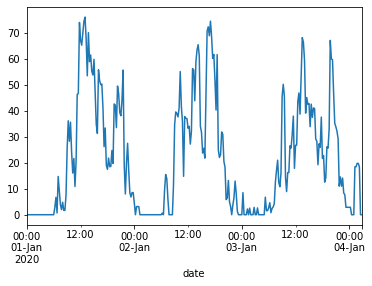

In [8]:
consumption_df.sum(1).iloc[:300].plot()

<AxesSubplot:xlabel='date'>

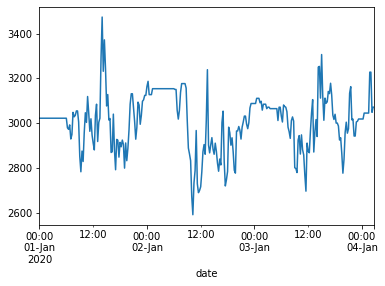

In [12]:
availability_df.sum(1).iloc[:300].plot()

In [13]:
car_properties_df

,BEV16_W53_d445f_FIAT_500e_2019,BEV22_W53_5d9e1_Tesla_Model_3_Long_Range_AWD_2019,BEV47_W53_9860e_Volkswagen_ID.3_2020,BEV79_W53_f7ac4_Volkswagen_ID.3_2020,BEV12_W53_094f3_Volkswagen_e-Golf_SE_2019,BEV18_W53_1e2a0_Tesla_Model_3_Long_Range_AWD_2019,BEV73_W53_32c27_BMW_i3_33_kWh_2017,BEV97_W53_e23e5_Hyundai_IONIQ_Electric_28_kWh_2019,BEV53_W53_f4778_Volkswagen_ID.3_2020,BEV34_W53_9e845_BMW_i3_33_kWh_2017,...,BEV67_W53_c1c49_Volkswagen_ID.3_2020,BEV55_W53_34538_FIAT_500e_2019,BEV61_W53_ff535_BMW_i3_33_kWh_2017,BEV91_W53_44e08_Renault_Zoe_Q90_2017,BEV68_W53_46aeb_Tesla_Model_3_Long_Range_AWD_2019,BEV0_W53_90dce_Tesla_Model_3_Long_Range_AWD_2019,BEV77_W53_9f715_Renault_Zoe_Q90_2017,BEV57_W53_a9324_Tesla_Model_3_Long_Range_AWD_2019,BEV0_W53_c064c_Renault_Zoe_Q90_2017,BEV73_W53_32c27_Tesla_Model_3_Long_Range_AWD_2019
soc_end,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.835,1.0,1.00,1.0,1.0,1.00,1.0,1.00,1.0
soc_init,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.500,0.5,0.50,0.5,0.5,0.50,0.5,0.50,0.5
battery_capacity,24.0,79.5,45.0,45.0,35.8,79.5,33.2,28.0,45.0,33.2,...,45.0,24.000,33.2,45.61,79.5,79.5,45.61,79.5,45.61,79.5


In [14]:
os.chdir("../")
data_path = os.getcwd()
#consumption_pickle = os.path.join(data_path, "consumption")
availaibilty_pickle = os.path.join(data_path, "availability")
property_pickle = os.path.join(data_path, "properties")

#consumption_df.to_pickle(consumption_pickle)
availability_df.to_pickle(availaibilty_pickle)
car_properties_df.to_pickle(property_pickle)

